# Visualization Results

In [10]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Basic results

In [57]:
raw_results = {
  "gpt-4o-mini": {
    "wins": 10,
    "losses": 59,
    "draws": 31,
    "stats": {
      "missedWins": 19,
      "missedBlocks": 43,
      "invalidMoves": 10
    }
  },
  "gpt-4o": {
    "wins": 1,
    "losses": 83,
    "draws": 16,
    "stats": {
      "missedWins": 6,
      "missedBlocks": 67,
      "invalidMoves": 24
    }
  },
  "gpt-4.5-preview": {
    "wins": 8,
    "losses": 68,
    "draws": 24,
    "stats": {
      "missedWins": 5,
      "missedBlocks": 52,
      "invalidMoves": 18
    }
  }
}

In [58]:
# Convert the main results to a DataFrame
results_df = pd.DataFrame.from_dict(raw_results, orient='index')

# break down stats into separate columns
stats_df = pd.DataFrame({
    model: {k: int(v) for k, v in data['stats'].items()}
    for model, data in raw_results.items()
}).T

# combine results and stats
results_df = pd.concat([results_df, stats_df], axis=1)
results_df.drop(columns=['stats'], inplace=True)
results_df

,wins,losses,draws,missedWins,missedBlocks,invalidMoves
gpt-4o-mini,10,59,31,19,43,10
gpt-4o,1,83,16,6,67,24
gpt-4.5-preview,8,68,24,5,52,18


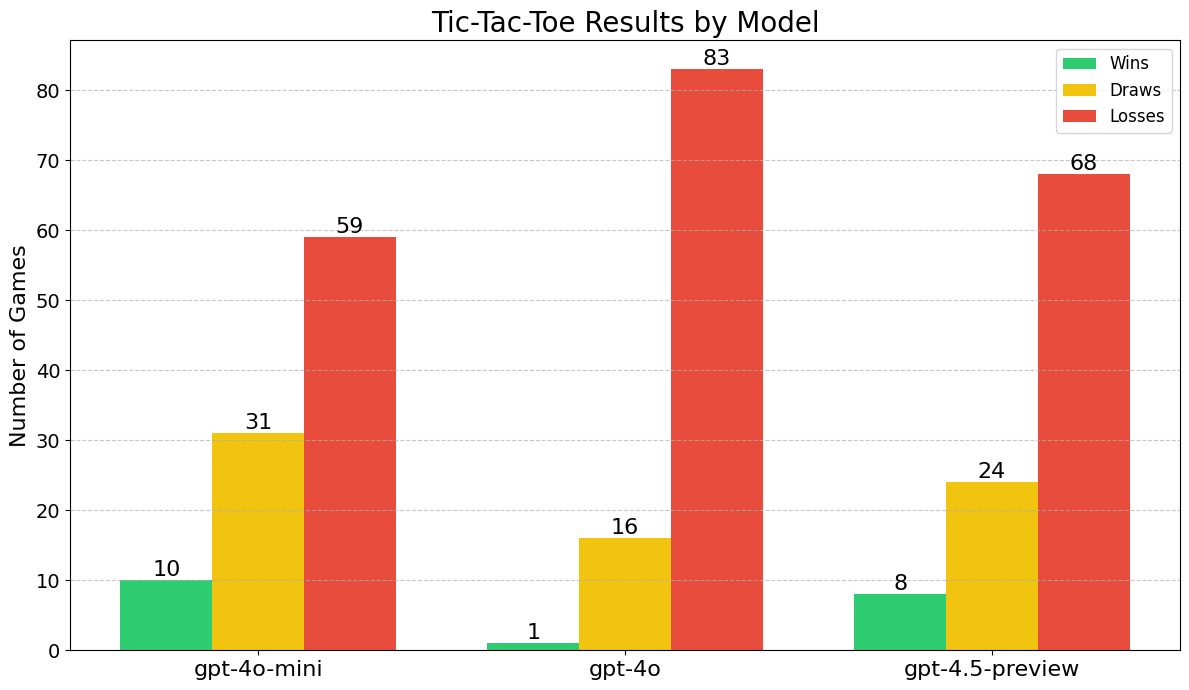

In [61]:
# Prepare data for clustered bar chart
plot_data = results_df[['wins', 'draws', 'losses']].astype(int)

# Set figure size
plt.figure(figsize=(12, 7))

# Set the width of the bars
bar_width = 0.25
index = np.arange(len(plot_data.index))

# Create bars
plt.bar(index - bar_width, plot_data['wins'], bar_width, 
        color='#2ecc71', label='Wins')
plt.bar(index, plot_data['draws'], bar_width, 
        color='#f1c40f', label='Draws')
plt.bar(index + bar_width, plot_data['losses'], bar_width, 
        color='#e74c3c', label='Losses')

# Customize the chart
#plt.xlabel('Model', fontsize=16)
plt.ylabel('Number of Games', fontsize=16)
plt.title('Tic-Tac-Toe Results by Model', fontsize=20)
plt.xticks(index, plot_data.index, fontsize=16)
plt.yticks(fontsize=14)
plt.legend(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels on each bar
for i, model in enumerate(plot_data.index):
    # Label wins
    plt.text(i - bar_width, plot_data.loc[model, 'wins'] + 0.1, 
             str(plot_data.loc[model, 'wins']), 
             ha='center', va='bottom', fontsize=16)
    
    # Label draws
    plt.text(i, plot_data.loc[model, 'draws'] + 0.1, 
             str(plot_data.loc[model, 'draws']), 
             ha='center', va='bottom', fontsize=16)
    
    # Label losses
    plt.text(i + bar_width, plot_data.loc[model, 'losses'] + 0.1, 
             str(plot_data.loc[model, 'losses']), 
             ha='center', va='bottom', fontsize=16)

plt.tight_layout()

<Figure size 1200x600 with 0 Axes>

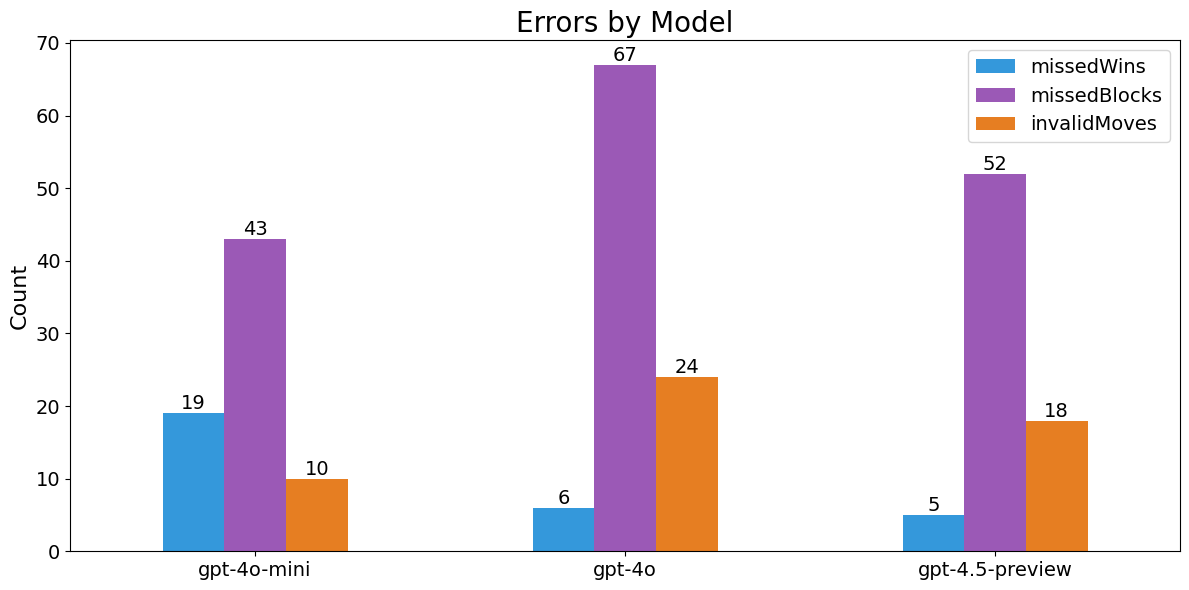

In [62]:
# Bar chart of stats
plt.figure(figsize=(12, 6))
ax = stats_df.plot(kind='bar', figsize=(12, 6), color=['#3498db', '#9b59b6', '#e67e22'])
plt.title('Errors by Model', fontsize=20)
plt.ylabel('Count', fontsize=16)
plt.legend(fontsize=14)
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()

# Add data labels
for i in range(len(stats_df.index)):
    for j in range(len(stats_df.columns)):
        value = stats_df.iloc[i, j]
        # Calculate the correct x position using get_x() and get_width()
        x_pos = ax.containers[j][i].get_x() + ax.containers[j][i].get_width()/2
        plt.text(x_pos, value, str(value),
                ha='center', va='bottom', fontsize=14)


## Comparing thinking and non-thinking prompts

In [28]:
raw_results = {
  "Standard Prompt": {
    "wins": 10,
    "losses": 59,
    "draws": 31,
    "stats": {
      "missedWins": 19,
      "missedBlocks": 43,
      "invalidMoves": 10
    }
  },
  "Thinking Prompt": {
    "wins": 4,
    "losses": 58,
    "draws": 38,
    "stats": {
      "missedWins": 4,
      "missedBlocks": 53,
      "invalidMoves": 59
    }
  }
}

In [29]:
# Convert the main results to a DataFrame
results_df = pd.DataFrame.from_dict(raw_results, orient='index')

# break down stats into separate columns
stats_df = pd.DataFrame({
    model: {k: int(v) for k, v in data['stats'].items()}
    for model, data in raw_results.items()
}).T

# combine results and stats
results_df = pd.concat([results_df, stats_df], axis=1)
results_df.drop(columns=['stats'], inplace=True)
results_df

,wins,losses,draws,missedWins,missedBlocks,invalidMoves
Standard Prompt,10,59,31,19,43,10
Thinking Prompt,4,58,38,4,53,59


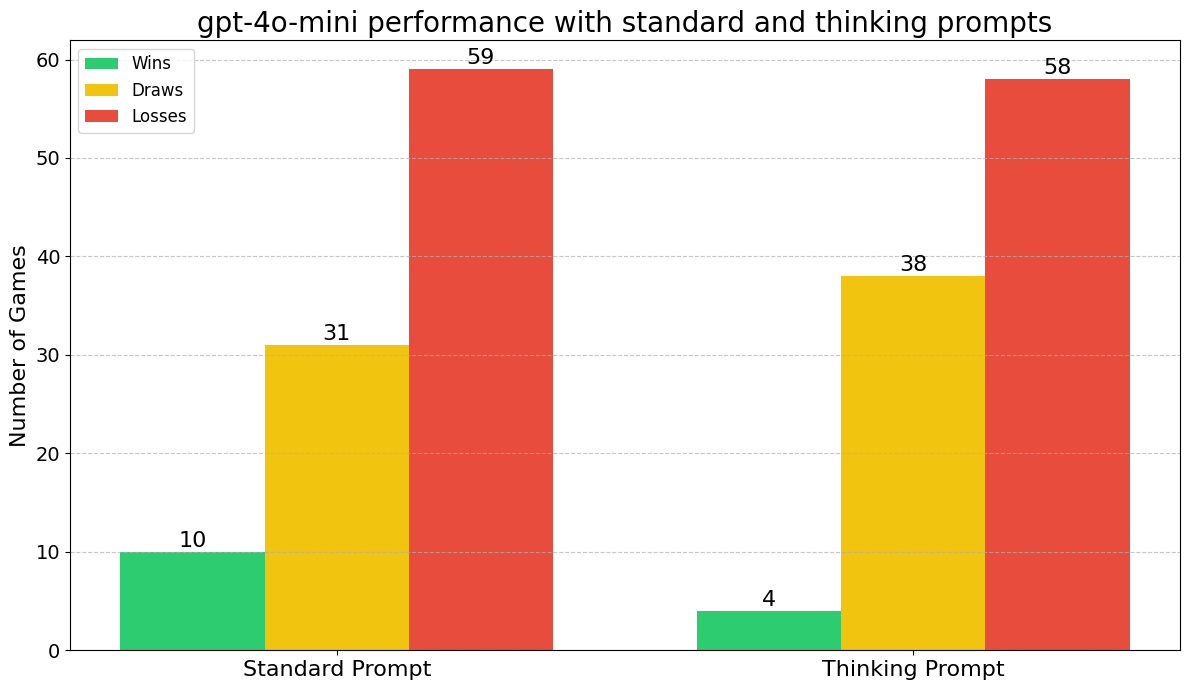

In [39]:
# Prepare data for clustered bar chart
plot_data = results_df[['wins', 'draws', 'losses']].astype(int)

# Set figure size
plt.figure(figsize=(12, 7))

# Set the width of the bars
bar_width = 0.25
index = np.arange(len(plot_data.index))

# Create bars
plt.bar(index - bar_width, plot_data['wins'], bar_width, 
        color='#2ecc71', label='Wins')
plt.bar(index, plot_data['draws'], bar_width, 
        color='#f1c40f', label='Draws')
plt.bar(index + bar_width, plot_data['losses'], bar_width, 
        color='#e74c3c', label='Losses')

# Customize the chart
#plt.xlabel('Model', fontsize=16)
plt.ylabel('Number of Games', fontsize=16)
plt.title('gpt-4o-mini performance with standard and thinking prompts', fontsize=20)
plt.xticks(index, plot_data.index, fontsize=16)
plt.yticks(fontsize=14)
plt.legend(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels on each bar
for i, model in enumerate(plot_data.index):
    # Label wins
    plt.text(i - bar_width, plot_data.loc[model, 'wins'] + 0.1, 
             str(plot_data.loc[model, 'wins']), 
             ha='center', va='bottom', fontsize=16)
    
    # Label draws
    plt.text(i, plot_data.loc[model, 'draws'] + 0.1, 
             str(plot_data.loc[model, 'draws']), 
             ha='center', va='bottom', fontsize=16)
    
    # Label losses
    plt.text(i + bar_width, plot_data.loc[model, 'losses'] + 0.1, 
             str(plot_data.loc[model, 'losses']), 
             ha='center', va='bottom', fontsize=16)

plt.tight_layout()

<Figure size 1200x600 with 0 Axes>

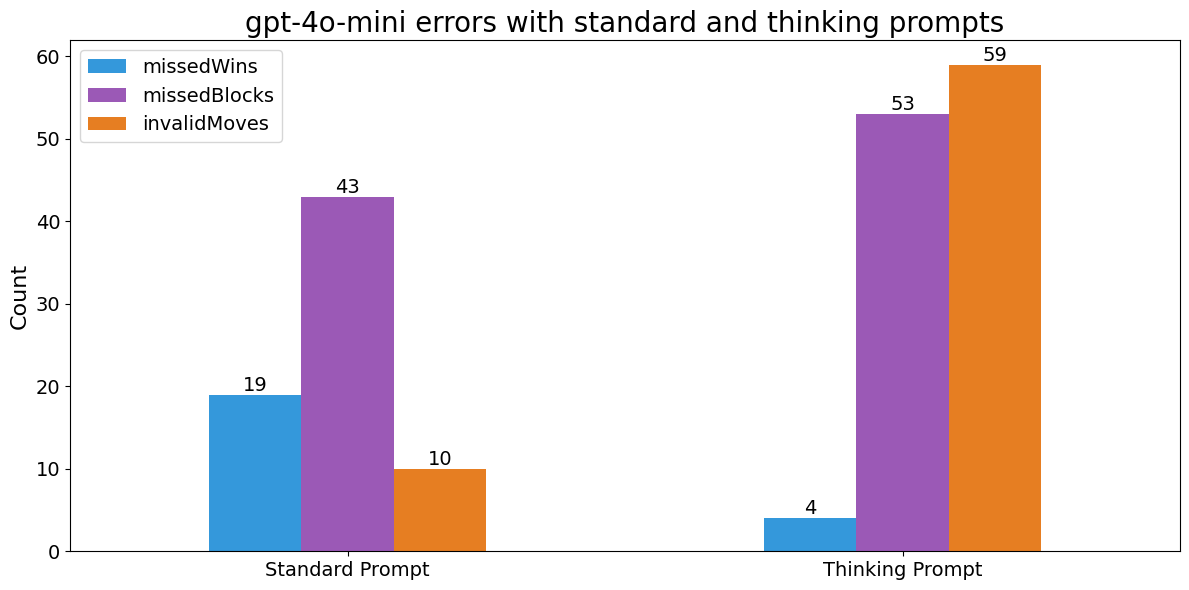

In [51]:
# Bar chart of stats
plt.figure(figsize=(12, 6))
ax = stats_df.plot(kind='bar', figsize=(12, 6), color=['#3498db', '#9b59b6', '#e67e22'])
plt.title('gpt-4o-mini errors with standard and thinking prompts', fontsize=20)
plt.ylabel('Count', fontsize=16)
plt.legend(fontsize=14)
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()

# Add data labels
for i in range(len(stats_df.index)):
    for j in range(len(stats_df.columns)):
        value = stats_df.iloc[i, j]
        # Calculate the correct x position using get_x() and get_width()
        x_pos = ax.containers[j][i].get_x() + ax.containers[j][i].get_width()/2
        plt.text(x_pos, value, str(value),
                ha='center', va='bottom', fontsize=14)
